# Model validation with Cross-Validation with Scikit-Learn

Hay tres herramientas fundamentales:
- cross validation: Es la herramienta principal. Permite multi-scoring (varios scores al mismo tiempo), devolver tanto el test score como el train scorey devolver el estimador entrenado para cada fold.
- cross validation prediction: Devuelve las predicciones en todo el dataset evaluadas por cross validation.
- cross validation score: Devuelve un solo score en todo el dataset evaluadas por cross validation.

Por tanto, el mas completo de todos es el primero. Si solo interesa un test scoring con una sola metrica el tercero es suficiente. Y si lo que se quiere es la prediccion para todo el dataset seria el segundo la mejor opcion.

#### References:
- [Sklearn - sklearn.model_selection.cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate)
- [Sklearn - sklearn.model_selection.cross_val_predict](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html#sklearn.model_selection.cross_val_predict)
- [Sklearn - sklearn.model_selection.cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)

In [6]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
import numpy as np

### data / model / k-fold

In [2]:
# data
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
# model
lasso = linear_model.Lasso()
# cross validation fold
kf = KFold(n_splits=3, shuffle = False)

# cross_validate

In [3]:
# cross validation
scores = cross_validate(lasso, X, y, cv=kf,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True,
                        n_jobs = -1,
                        verbose = 0,
                        return_estimator = False,
                        error_score = 'raise' 
                       )
# display results
print(kf)
for k, v in scores.items():
    print(f'"{k}": {v}')

KFold(n_splits=3, random_state=None, shuffle=False)
"fit_time": [0.00106907 0.00107598 0.00102806]
"score_time": [0.00073886 0.000741   0.00071478]
"test_r2": [0.33150734 0.08022311 0.03531764]
"train_r2": [0.28010158 0.39088426 0.22784852]
"test_neg_mean_squared_error": [-3635.51152303 -3573.34242148 -6114.78229547]
"train_neg_mean_squared_error": [-4141.52635215 -3755.8476331  -3657.43943045]


In [16]:
# cross validation fold
kf = KFold(n_splits=10, shuffle = False)
# scores
metrics = ('r2', 'neg_mean_squared_error')
# cross validation
scores = cross_validate(lasso, X, y, cv=kf, scoring=metrics, return_train_score=True, n_jobs = -1, error_score = 'raise')
# display scores
for metric in metrics:
    print('TRAIN: %s = %.3f +/- %.3f /// TEST: %s = %.3f +/- %.3f'%(metric, np.mean(scores[f"train_{metric}"]), np.std(scores[f"train_{metric}"]), 
                                                                  metric, np.mean(scores[f"test_{metric}"]), np.std(scores[f"test_{metric}"])))
    

TRAIN: r2 = 0.317 +/- 0.029 /// TEST: r2 = 0.186 +/- 0.125
TRAIN: neg_mean_squared_error = -3856.931 +/- 79.096 /// TEST: neg_mean_squared_error = -4191.598 +/- 1782.915


# cross_val_score

In [5]:
# cross validation fold
kf = KFold(n_splits=10, shuffle = False)
# cross validation
scores = cross_val_score(lasso, X, y, cv=kf, scoring='r2', n_jobs = -1, verbose = 0, error_score = 'raise')
# display results
print(kf)
print('r2 = %.3f +/- %.3f'%(np.mean(scores), np.std(scores)))

KFold(n_splits=10, random_state=None, shuffle=False)
r2 = 0.186 +/- 0.125


> NOTA: Tanto *cross_validate* como *cross_val_score* efectivamente devuelven el mismo test score.

# cross_val_prediction

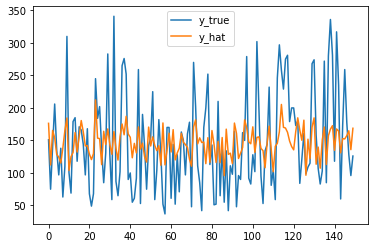

In [12]:
# cross validation fold
kf = KFold(n_splits=10, shuffle = False)
# cross validation
y_pred =  cross_val_predict(lasso, X, y, cv=kf, n_jobs = -1, verbose = 0, method = 'predict')
# plot predictions
import matplotlib.pyplot as plt
plt.plot(y, label = "y_true")
plt.plot(y_pred, label = "y_hat")
plt.legend()
plt.show()